# 7. 다양한 전처리 기법

---
### 학습 목표
* **중복된 데이터를 찾아 제거**할 수 있고, **결측치(missing data)를 제거**하거나 채워 넣을 수 있습니다.
* 데이터를 **정규화**시킬 수 있습니다.
* **이상치(outlier)**를 찾고, 이를 처리할 수 있습니다.
* 범주형 데이터를 **원-핫 인코딩**할 수 있습니다.
* **연속적인 데이터를 구간으로 나눠** 범주형 데이터로 변환할 수 있습니다.

### 학습 목차
1. 결측치(Missing Data)
2. 중복된 데이터
3. 이상치(Outlier)
4. 정규화(Normalization)
5. 원-핫 인코딩(One-Hot Encoding)
6. 구간화(Binning)
---

## 7-2. 결측치(Missing Data)

결측치 처리 방법은 **제거** 또는 데이터에 특성에 맞게 **대체**하는 것


[데이터 파일](https://d3s0tskafalll9.cloudfront.net/media/documents/trade.csv)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

csv_file_path = '/content/drive/MyDrive/Aiffel_Nodes/data_preprocess/trade.csv'
trade = pd.read_csv(csv_file_path) 
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,기타사항
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0,NaN
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0,NaN
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,NaN
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0,NaN
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0,NaN


In [ ]:
print('전체 데이터 건수 : ',len(trade))
print('컬럼별 결측치 개수')
# len(trade) 즉 199 에서 trade.count() 컬럼마다 존재하는 데이터 개수수
len(trade) - trade.count()
trade.isnull().sum()

전체 데이터 건수 :  199
컬럼별 결측치 개수


기간        0
국가명       0
수출건수      3
수출금액      4
수입건수      3
수입금액      3
무역수지      4
기타사항    199
dtype: int64

In [ ]:
# 전부 결측치 이기 때문에 컬럼 drop
trade = trade.drop('기타사항', axis=1)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0


In [ ]:
# .any(axis=)는 정한 축(axis)을 기준으로 true가 하나라도 있으면 true 아니면 false입니다.
# 따라서 (0,1)축 중에서 1축 몇번 데이터가 false인지 볼 수 있다.
mis_datas_bool = trade.isnull().any(axis=1)

trade[mis_datas_bool]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
196,2020년 06월,중국,NaN,NaN,NaN,NaN,NaN
197,2020년 06월,미국,NaN,NaN,NaN,NaN,NaN
198,2020년 06월,일본,NaN,NaN,NaN,NaN,NaN


In [ ]:
# how옵션으로 subset에 있는 컬럼들이 전부 결측치라면 행을 삭제한다.
trade.dropna(how='all', subset=['수출건수', '수출금액', '수입건수', '수입금액', '무역수지'], inplace=True)
print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


In [ ]:
mis_datas_bool = trade.isnull().any(axis=1)

trade[mis_datas_bool]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN


1. 특정 값을 지정해 줄 수 있습니다. 그러나 결측치가 많은 경우, 모두 같은 값으로 대체한다면 데이터의 분산이 실제보다 작아지는 문제가 생길 수 있습니다.
2. 평균, 중앙값 등으로 대체할 수 있습니다. 1번에서 특정 값으로 대체했을 때와 마찬가지로 결측치가 많은 경우 데이터의 분산이 실제보다 작아지는 문제가 발생할 수 있습니다.
3. 다른 데이터를 이용해 예측값으로 대체할 수 있습니다. 예를 들어 머신러닝 모델로 2020년 4월 미국의 예측값을 만들고, 이 값으로 결측치를 보완할 수 있습니다.
4. 시계열 특성을 가진 데이터의 경우 앞뒤 데이터를 통해 결측치를 대체할 수 있습니다. 예를 들어 기온을 측정하는 센서 데이터에서 결측치가 발생할 경우, 전후 데이터의 평균으로 보완할 수 있습니다.

In [ ]:
trade[(trade['국가명']=='미국')&((trade['기간']=='2020년 03월')|(trade['기간']=='2020년 05월'))]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
188,2020년 03월,미국,97117.0,7292838.0,1368345.0,5388338.0,1904500.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


In [ ]:
trade.loc[191, '수출금액'] = (trade.loc[188, '수출금액'] + trade.loc[194, '수출금액'] )/2
trade.loc[[191]]


,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,NaN


In [ ]:
trade[(trade['국가명']=='미국')&((trade['기간']=='2020년 03월')|(trade['기간']=='2020년 05월'))]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
188,2020년 03월,미국,97117.0,7292838.0,1368345.0,5388338.0,1904500.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


In [ ]:
trade.loc[191, '수출금액'] = (trade.loc[188, '수출금액'] + trade.loc[194, '수출금액'] )/2
# Q. 무역수지 값을 채워주세요!
trade.loc[191, '무역수지'] =  (trade.loc[191, '수출금액'] - trade.loc[191, '수입금액'] )
trade.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,908043.0


## 7-3. 중복된 데이터

In [ ]:
trade[trade.duplicated()]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


In [ ]:
trade[(trade['기간']=='2020년 03월')&(trade['국가명']=='중국')]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
186,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


In [ ]:
trade.drop_duplicates(inplace=True)
print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


In [ ]:
df = pd.DataFrame({'id':['001', '002', '003', '004', '002'], 
                   'name':['Park Yun', 'Kim Sung', 'Park Jin', 'Lee Han', 'Kim Min']})
df

,id,name
0,001,Park Yun
1,002,Kim Sung
2,003,Park Jin
3,004,Lee Han
4,002,Kim Min


In [ ]:
# Q. 링크의 공식 문서를 참고해서,
# id가 중복된 경우 나중에 들어온 값만 남기는 코드를 작성해보세요!
# ('Kim Sung' 항목이 삭제되어야 합니다.)
df.drop_duplicates(subset=['id'], keep='last')

## 7-4. 이상치(Outlier)

평균을 빼주고 표준편차로 나눠 z score를 계산합니다.   

기준을 작게 하면 이상치라고 판단하는 데이터가 많아지고, 기준을 크게 하면 이상치라고 판단하는 데이터가 적어집니다.   

이상치를 판단한 뒤 어떻게 해야 할까요?

1. 가장 간단한 방법으로 이상치를 삭제할 수 있습니다. 이상치를 원래 데이터에서 삭제하고, 이상치끼리 따로 분석하는 방안도 있습니다.
2. 이상치를 다른 값으로 대체할 수 있습니다. 데이터가 적으면 이상치를 삭제하기보다 다른 값으로 대체하는 것이 나을 수 있습니다. 예를 들어 최댓값, 최솟값을 설정해 데이터의 범위를 제한할 수 있습니다.
3. 혹은 결측치와 마찬가지로 다른 데이터를 활용하여 예측 모델을 만들어 예측값을 활용할 수도 있습니다.
4. 아니면 binning을 통해 수치형 데이터를 범주형으로 바꿀 수도 있습니다.

In [ ]:
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index
print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


In [ ]:
trade.loc[outlier(trade, '무역수지', 1.5)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
6,2015년 03월,중국,117529.0,11868032.0,234321.0,7226911.0,4641121.0
75,2017년 02월,중국,159062.0,11118131.0,188555.0,6600637.0,4517495.0
80,2017년 03월,일본,65093.0,2395932.0,165734.0,5157589.0,-2761657.0
96,2017년 09월,중국,183442.0,13540683.0,295443.0,8443414.0,5097269.0
99,2017년 10월,중국,137873.0,12580474.0,244977.0,7932403.0,4648071.0
101,2017년 10월,일본,63510.0,1847999.0,127696.0,4418583.0,-2570584.0
102,2017년 11월,중국,421194.0,14000887.0,307790.0,9253318.0,4747569.0
105,2017년 12월,중국,218114.0,13848364.0,290347.0,8600132.0,5248232.0
114,2018년 03월,중국,232396.0,13576667.0,267249.0,8412516.0,5164151.0
116,2018년 03월,일본,80142.0,2603450.0,159601.0,5226141.0,-2622691.0


In [ ]:
# Q. not_outlier() 함수를 구현하세요.
def not_outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col])<=z].index

print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


In [ ]:
trade.loc[not_outlier(trade, '무역수지', 1.5)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0
...,...,...,...,...,...,...,...
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,908043.0
192,2020년 04월,일본,134118.0,1989323.0,141207.0,3989562.0,-2000239.0
193,2020년 05월,중국,185320.0,10746069.0,349007.0,8989920.0,1756149.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


### IQR method

In [ ]:
np.random.seed(2020)
data = np.random.randn(100)  # 평균 0, 표준편차 1의 분포에서 100개의 숫자를 샘플링한 데이터 생성
data = np.concatenate((data, np.array([8, 10, -3, -5])))      # [8, 10, -3, -5])를 데이터 뒤에 추가함
data

array([-1.76884571,  0.07555227, -1.1306297 , -0.65143017, -0.89311563,
       -1.27410098, -0.06115443,  0.06451384,  0.41011295, -0.57288249,
       -0.80133362,  1.31203519,  1.27469887, -1.2143576 ,  0.31371941,
       -1.44482142, -0.3689613 , -0.76922658,  0.3926161 ,  0.05729383,
        2.08997884,  0.04197131, -0.04834072, -0.51315392, -0.08458928,
       -1.21545008, -1.41293073, -1.48691055,  0.38222486,  0.937673  ,
        1.77267804,  0.87882801,  0.33171912, -0.30603567,  1.24026615,
       -0.21562684,  0.15592948,  0.09805553,  0.83209585,  2.04520542,
       -0.31681392, -1.31283291, -1.75445746,  0.10209408, -1.36150208,
        0.48178488, -0.20832874, -0.09186351,  0.70268816,  0.10365506,
        0.62123638,  0.95411497,  2.03781352, -0.48445122,  0.2071549 ,
        1.64424216, -0.4882074 , -0.01782826,  0.46891556,  0.27987266,
       -0.64664972, -0.54406002, -0.16008985,  0.03781172,  1.03383296,
       -1.23096117, -1.24673665,  0.29572055,  2.1409624 , -0.92

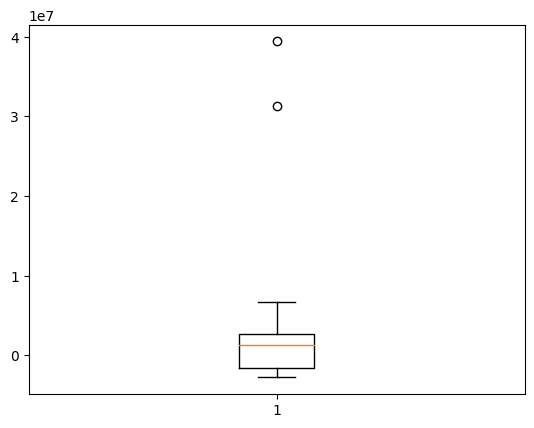

0     39406760.0
54    31276100.0
Name: 무역수지, dtype: float64

In [ ]:
# Q. 사분위 범위수를 이용해서 이상치를 찾는 outlier2() 함수를 구현해보세요.
trade

def outlier2(df, col):
    data = df[col]
    Q3, Q1 = np.percentile(data, [75 ,25])
    return data[(Q1-1.5*(Q3-Q1) > data)|((Q3+1.5*(Q3-Q1)) < data)]

# 이상치 만들기기
trade.loc[[0],'무역수지'] = trade.loc[[0],'무역수지']*10
trade.loc[[54],'무역수지'] = trade.loc[[54],'무역수지']*10

fig, ax = plt.subplots()
ax.boxplot(trade['무역수지'])
plt.show()


# 내가 만든 이상치를 찾아내는 것을 볼 수 있다.
outlier2(trade, '무역수지')

## 7-5. 정규화(Normalization)

데이터 간의 범위가 다른 경우에 학습에 문제가 발생 할 수 있다. 따라서 정규화가 필요하다.

* Standardization
  + 데이터의 평균은 0, 분산은 1로 변환합니다.
  + Standardization은 보통 평균이 0이고 표준편차가 1일 때 사용합니다. 그렇기에 데이터가 가우시안 분포를 따를 경우 유용합니다.   

$$
  \frac{X-μ}{σ}
$$
* Min-Max Scaling
  + 데이터의 최솟값은 0, 최댓값은 1로 변환합니다.
  + Min-Max Scaling은 피처의 범위가 다를 때 주로 사용하며 확률 분포를 모를 때 유용합니다.
$$
 \frac{X-X_{min}}{X_{max}-X_{min}}
$$



In [ ]:
# 정규분포를 따라 랜덤하게 데이터 x를 생성합니다. 
x = pd.DataFrame({'A': np.random.randn(100)*4+4,
                 'B': np.random.randn(100)-1})
x

,A,B
0,6.205792,-1.485248
1,-0.604047,-0.727779
2,3.018785,-0.517099
3,3.323325,-0.414949
4,6.167679,-0.582630
...,...,...
95,5.062917,-1.122239
96,-0.166839,-2.487547
97,-4.230178,0.589513
98,-0.562115,0.779614


In [ ]:
# 데이터 x를 Standardization 기법으로 정규화합니다. 
x_standardization = (x-x.mean())/x.std()
print(x_standardization)

# 데이터 x를 min-max scaling 기법으로 정규화합니다. 
x_min_max = (x-x.min())/(x.max()-x.min())
print(x_min_max)

           A         B
0   0.559307 -0.314995
1  -1.132240  0.407499
2  -0.232338  0.608450
3  -0.156691  0.705884
4   0.549839  0.545945
..       ...       ...
95  0.275419  0.031252
96 -1.023639 -1.271014
97 -2.032961  1.663966
98 -1.121824  1.845290
99  0.504345 -0.543153

[100 rows x 2 columns]
           A         B
0   0.607216  0.426240
1   0.267692  0.571821
2   0.448318  0.612312
3   0.463502  0.631944
4   0.605316  0.599717
..       ...       ...
95  0.550235  0.496008
96  0.289490  0.233606
97  0.086901  0.824995
98  0.269782  0.861531
99  0.596184  0.380268

[100 rows x 2 columns]


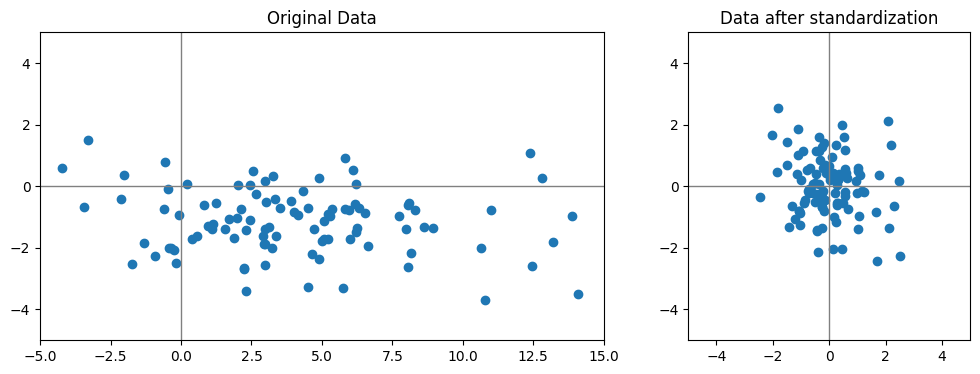

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_standardization['A'], x_standardization['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after standardization')

plt.show()

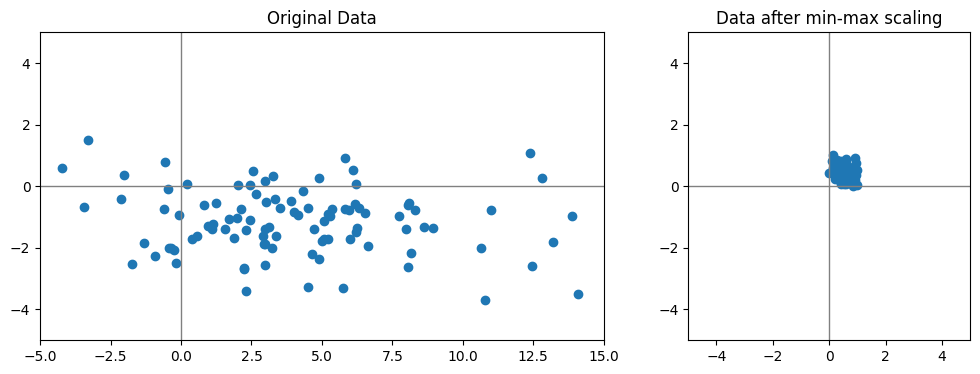

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_min_max['A'], x_min_max['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after min-max scaling')

plt.show()

In [ ]:
# trade 데이터를 standardization 기법으로 정규화합니다. 
cols = ['수출건수', '수출금액', '수입건수', '수입금액', '무역수지']
trade_standardization = (trade[cols]-trade[cols].mean())/trade[cols].std()
trade_standardization.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,-1.093143e-16,6.832142e-17,1.821904e-17,-5.465713e-17,-1.821904e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.194976e-01,-1.231761e+00,-9.984408e-01,-1.276341e+00,-9.722914e-01
25%,-5.937426e-01,-1.041338e+00,-7.673625e-01,-7.911669e-01,-7.006272e-01
50%,-4.373265e-01,-1.564700e-01,-3.429346e-01,-4.137392e-01,1.935674e-03
75%,4.420459e-01,1.037200e+00,3.927781e-01,8.827841e-01,3.385781e-01
max,5.486317e+00,2.078416e+00,3.239068e+00,2.376092e+00,9.065736e+00


In [ ]:
# Q. trade 데이터를 min-max scaling 기법으로 정규화합니다.
trade[cols] = (trade[cols]-trade[cols].min())/(trade[cols].max()-trade[cols].min())
trade.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.143541,0.372113,0.235620,0.349450,0.096861
std,0.156108,0.302099,0.235988,0.273790,0.099621
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.050853,0.057527,0.054532,0.132836,0.027064
50%,0.075271,0.324844,0.154691,0.236172,0.097054
75%,0.212548,0.685450,0.328311,0.591147,0.130590
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train = pd.DataFrame([[10, -10], [30, 10], [50, 0]])
test = pd.DataFrame([[0, 1], [10, 10]])
print("👽 It's okay, no biggie.")

# Q. train 데이터와 test 데이터에 정규화를 적용해봅시다.
train_min = train.min()
train_max = train.max()

# 중요한 점은, test 데이터에 min-max scaling을 적용할 때도
# train 데이터 기준으로 수행해야 한다는 것입니다.
train_min_max = (train-train_min)/(train_max-train_min)
test_min_max = (test-train_min)/(train_max-train_min)
print(train_min_max,'\n\n',test_min_max)

👽 It's okay, no biggie.
     0    1
0  0.0  0.0
1  0.5  1.0
2  1.0  0.5 

       0     1
0 -0.25  0.55
1  0.00  1.00


In [ ]:
from sklearn.preprocessing import MinMaxScaler
train = [[10, -10], [30, 10], [50, 0]]
test = [[0, 1]]
scaler = MinMaxScaler()
print("👽 It's okay, no biggie.")

scaler.fit_transform(train)
scaler.transform(test)

👽 It's okay, no biggie.


array([[-0.25,  0.55]])

## 7-6. 원-핫 인코딩(One-Hot Encoding)



In [ ]:
trade

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,0.142372,0.794728,0.197014,0.700903,1.000000
1,2015년 01월,미국,0.035939,0.295728,0.332972,0.085394,0.111414
2,2015년 01월,일본,0.011187,0.042477,0.001249,0.112938,0.028119
3,2015년 02월,중국,0.078351,0.629759,0.099597,0.542551,0.135372
4,2015년 02월,미국,0.024131,0.254394,0.270146,0.000000,0.113467
...,...,...,...,...,...,...,...
191,2020년 04월,미국,0.118243,0.325201,0.823509,0.277977,0.087025
192,2020년 04월,일본,0.178207,0.022433,0.046863,0.135050,0.018057
193,2020년 05월,중국,0.284970,0.692373,0.208265,0.816241,0.107137
194,2020년 05월,미국,0.162527,0.222220,0.835972,0.175552,0.072934


In [ ]:
#trade 데이터의 국가명 컬럼 원본
print(trade['국가명'].head())  

# get_dummies를 통해 국가명 원-핫 인코딩
country = pd.get_dummies(trade['국가명'])
country.head()

0    중국
1    미국
2    일본
3    중국
4    미국
Name: 국가명, dtype: object


,미국,일본,중국
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,1,0,0


In [ ]:
## 원핫으로 바꾼 데이터를 넣고 국가명을 지우는 과정정
trade = pd.concat([trade, country], axis=1)
trade.drop(['국가명'], axis=1, inplace=True)
trade.head()


,기간,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국,미국,일본,중국
0,2015년 01월,0.142372,0.794728,0.197014,0.700903,1.000000,0,0,1,0,0,1
1,2015년 01월,0.035939,0.295728,0.332972,0.085394,0.111414,1,0,0,1,0,0
2,2015년 01월,0.011187,0.042477,0.001249,0.112938,0.028119,0,1,0,0,1,0
3,2015년 02월,0.078351,0.629759,0.099597,0.542551,0.135372,0,0,1,0,0,1
4,2015년 02월,0.024131,0.254394,0.270146,0.000000,0.113467,1,0,0,1,0,0


## 7-7. 구간화(Binning)


<Axes: >

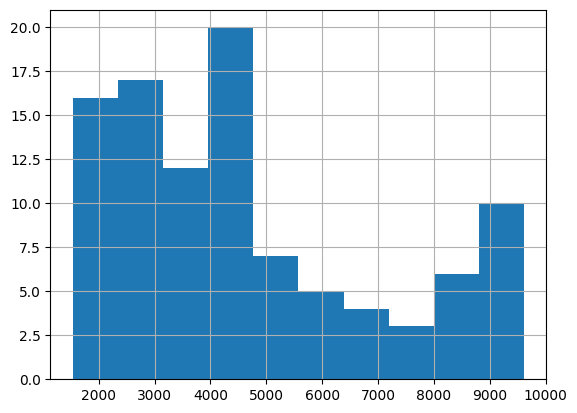

In [ ]:
salary = pd.Series([4300, 8370, 1750, 3830, 1840, 4220, 3020, 2290, 4740, 4600, 
                    2860, 3400, 4800, 4470, 2440, 4530, 4850, 4850, 4760, 4500, 
                    4640, 3000, 1880, 4880, 2240, 4750, 2750, 2810, 3100, 4290, 
                    1540, 2870, 1780, 4670, 4150, 2010, 3580, 1610, 2930, 4300, 
                    2740, 1680, 3490, 4350, 1680, 6420, 8740, 8980, 9080, 3990, 
                    4960, 3700, 9600, 9330, 5600, 4100, 1770, 8280, 3120, 1950, 
                    4210, 2020, 3820, 3170, 6330, 2570, 6940, 8610, 5060, 6370,
                    9080, 3760, 8060, 2500, 4660, 1770, 9220, 3380, 2490, 3450, 
                    1960, 7210, 5810, 9450, 8910, 3470, 7350, 8410, 7520, 9610, 
                    5150, 2630, 5610, 2750, 7050, 3350, 9450, 7140, 4170, 3090])

salary.hist()


In [ ]:
# 데이터를 설정한 구간(bins)으로 나누어 준다. 
bins = [0, 2000, 4000, 6000, 8000, 10000]
ctg = pd.cut(salary, bins=bins)

# 0번째는 (4000,6000)구간에 있다는 것을 알려줌
ctg

0      (4000, 6000]
1     (8000, 10000]
2         (0, 2000]
3      (2000, 4000]
4         (0, 2000]
          ...      
95     (2000, 4000]
96    (8000, 10000]
97     (6000, 8000]
98     (4000, 6000]
99     (2000, 4000]
Length: 100, dtype: category
Categories (5, interval[int64, right]): [(0, 2000] < (2000, 4000] < (4000, 6000] < (6000, 8000] <
                                         (8000, 10000]]

In [ ]:
print('salary[0]:', salary[0])
print('salary[0]가 속한 카테고리:', ctg[0])
print("---------------------")
ctg.value_counts().sort_index()

salary[0]: 4300
salary[0]가 속한 카테고리: (4000, 6000]
---------------------


(0, 2000]        12
(2000, 4000]     34
(4000, 6000]     29
(6000, 8000]      9
(8000, 10000]    16
dtype: int64

In [ ]:
# 'bins' 옵션에 6을 입력하면 6개의 구간으로 나눔눔
ctg1 = pd.cut(salary, bins=6)

# qcut은 데이터의 분포가 비슷하도록 나눔
ctg2 = pd.qcut(salary, q=5)
